## Telecom Churn - ML Group Case Study

### Problem Statement

* In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Contributors
* Dhirendra Kumar (Facilitator)
* DattarajGaripelly (Team Member)

## Importing Libraries and loading dataset to Datasets

In [36]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#to split data into train data and test data
from sklearn.model_selection import train_test_split

#to rescale features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# To suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Importing dataset
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [63]:
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [64]:
# summary
telecom_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [65]:
telecom_data.shape

(99999, 226)

* There are 99999 rows and 226 columns

In [66]:
# create backup of telecom dataset
Backup = telecom_data.copy()

In [68]:
Backup.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


## Data Preprocessing

In [69]:
# Fetching columns with recharge information
recharge_columns =  telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [70]:
# Fetching recharge information columns with null values and the missing percentage
telecom_data_na = (telecom_data.loc[:,recharge_columns].isnull().sum() / len(telecom_data)) * 100
telecom_data_na = telecom_data_na.drop(telecom_data_na[telecom_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :telecom_data_na})
missing_data

,Missing Ratio
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
date_of_last_rech_data_6,74.846748
av_rech_amt_data_7,74.428744
max_rech_data_7,74.428744
total_rech_data_7,74.428744
date_of_last_rech_data_7,74.428744
av_rech_amt_data_9,74.077741
max_rech_data_9,74.077741


In [71]:
# About 74 % of total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, av_rech_amt_data_9 are null values
# replacing null values with Zero
telecom_data['total_rech_data_6'] = telecom_data['total_rech_data_6'].replace(np.NaN,0.0)
telecom_data['total_rech_data_7'] = telecom_data['total_rech_data_7'].replace(np.NaN,0.0)
telecom_data['total_rech_data_8'] = telecom_data['total_rech_data_8'].replace(np.NaN,0.0)
telecom_data['total_rech_data_9'] = telecom_data['total_rech_data_9'].replace(np.NaN,0.0)

telecom_data['av_rech_amt_data_6'] = telecom_data['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_data['av_rech_amt_data_7'] = telecom_data['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_data['av_rech_amt_data_8'] = telecom_data['av_rech_amt_data_8'].replace(np.NaN,0.0)
telecom_data['av_rech_amt_data_9'] = telecom_data['av_rech_amt_data_9'].replace(np.NaN,0.0)

In [72]:
telecom_data['total_rech_amt_data_6'] = telecom_data.av_rech_amt_data_6 * telecom_data.total_rech_data_6
telecom_data['total_rech_amt_data_7'] = telecom_data.av_rech_amt_data_7 * telecom_data.total_rech_data_7
telecom_data['total_rech_amt_data_8'] = telecom_data.av_rech_amt_data_8 * telecom_data.total_rech_data_8
telecom_data['total_rech_amt_data_9'] = telecom_data.av_rech_amt_data_9 * telecom_data.total_rech_data_9

In [73]:
# Dropping all av_rech_amt_data_X and total_rech_data_X related columns 
telecom_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [74]:
telecom_data.shape

(99999, 222)

### Define high-value customers as follows:

- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

In [75]:
# average recharge amount
telecom_data['av_rech_amt_6_7'] = (telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_data_6 
                                               + telecom_data.total_rech_amt_7+ telecom_data.total_rech_amt_data_7)/2

# 70th percentile
high_value_filter_6_7 = np.percentile(telecom_data.av_rech_amt_6_7, 70.0)


#Filtering the high value customers basing on the 70th percentile as per problem statement
telecom_HighValueCustomer = telecom_data[telecom_data.av_rech_amt_6_7 > high_value_filter_6_7]
telecom_HighValueCustomer.shape

(29953, 223)

#### Adding Churn column in dataset based on 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [76]:
#Tagging churn indicator
telecom_HighValueCustomer['churn'] = np.where(telecom_HighValueCustomer[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_HighValueCustomer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,av_rech_amt_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,57.74,19.38,18.74,0.00,0.0,0.0,0.0,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0,583.0,0


In [77]:
telecom_HighValueCustomer['churn'].value_counts()/len(telecom_HighValueCustomer)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [78]:
object_col_data = telecom_HighValueCustomer.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

for col in object_col_data.columns:
    telecom_HighValueCustomer[col] = pd.to_datetime(telecom_HighValueCustomer[col])

last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
last_date_of_month_9        9/30/2014
date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [79]:
# Dropping attributes
drop_cols = [col for col in telecom_HighValueCustomer.columns if '_9' in col]
print(drop_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_amt_data_9']


In [80]:
telecom_HighValueCustomer.drop(drop_cols, axis=1, inplace=True)
telecom_HighValueCustomer.shape

(29953, 171)

In [81]:
# Dropping Columns with > 30% of missing values

col = telecom_HighValueCustomer.columns
null_perc = telecom_HighValueCustomer.isnull().sum() * 100 / len(telecom_HighValueCustomer)
null_tel = pd.DataFrame({'col_name': col,
                                 'perc_null': null_perc})

drop_cols = null_tel[null_tel["perc_null"] > 30.0]["col_name"]

telecom_HighValueCustomer.drop(drop_cols, axis=1,inplace = True)
telecom_HighValueCustomer.shape

(29953, 147)

In [82]:
# Dropping highly correlated columns

cor = telecom_HighValueCustomer.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6         0.601325
total_ic_mou_7    loc_ic_t2t_mou_7    0.601655
total_rech_amt_8  arpu_6              0.604021
roam_og_mou_8     roam_og_mou_7       0.605131
offnet_mou_8      offnet_mou_6        0.605156
                                        ...   
total_rech_amt_7  arpu_7              0.943571
total_rech_amt_6  arpu_6              0.946104
isd_og_mou_8      isd_og_mou_7        0.949809
                  isd_og_mou_6        0.950194
total_rech_amt_8  arpu_8              0.955322
Length: 206, dtype: float64

In [83]:
drop_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_HighValueCustomer.drop(drop_list, axis=1, inplace=True)

In [84]:
telecom_HighValueCustomer.shape

(29953, 107)

In [85]:
#Fetching columns with 1 unique value
col_list = telecom_HighValueCustomer.loc[:,telecom_HighValueCustomer.apply(pd.Series.nunique) == 1]
col_list.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,NaN,NaN,0.0,NaN,NaN,0.0
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Removing columns with one unique value 
telecom_HighValueCustomer = telecom_HighValueCustomer.loc[:,telecom_HighValueCustomer.apply(pd.Series.nunique) != 1]
telecom_HighValueCustomer.shape

(29953, 94)

In [89]:
# Renaming columns
telecom_HighValueCustomer.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

## Exploratory Data Analysis

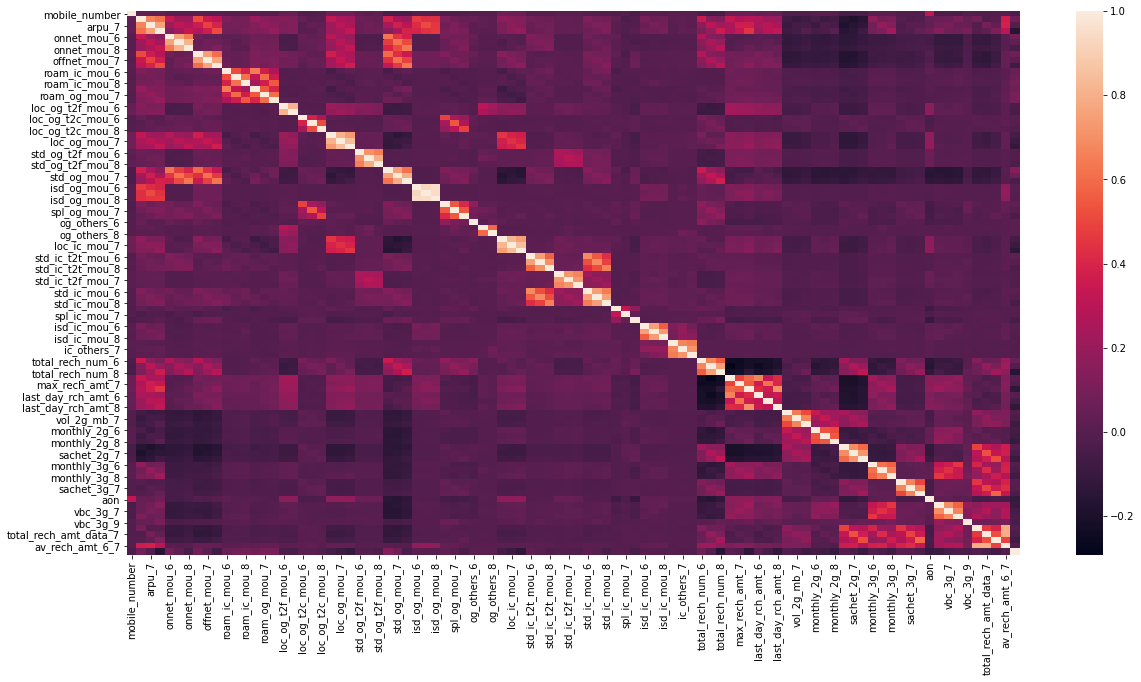

In [90]:
#finding the correlation matrix using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(telecom_HighValueCustomer.corr())
plt.show()

In [91]:
telecom_HighValueCustomer['aon_mon'] = telecom_HighValueCustomer['aon']/30
telecom_HighValueCustomer.drop('aon', axis=1, inplace=True)
telecom_HighValueCustomer['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Customers by their tenure')

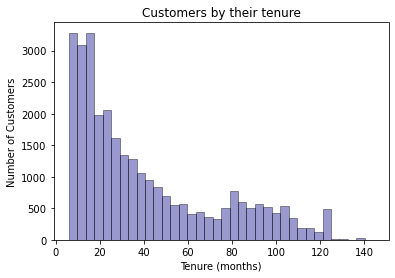

In [73]:
ax = sns.distplot(telecom_HighValueCustomer['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

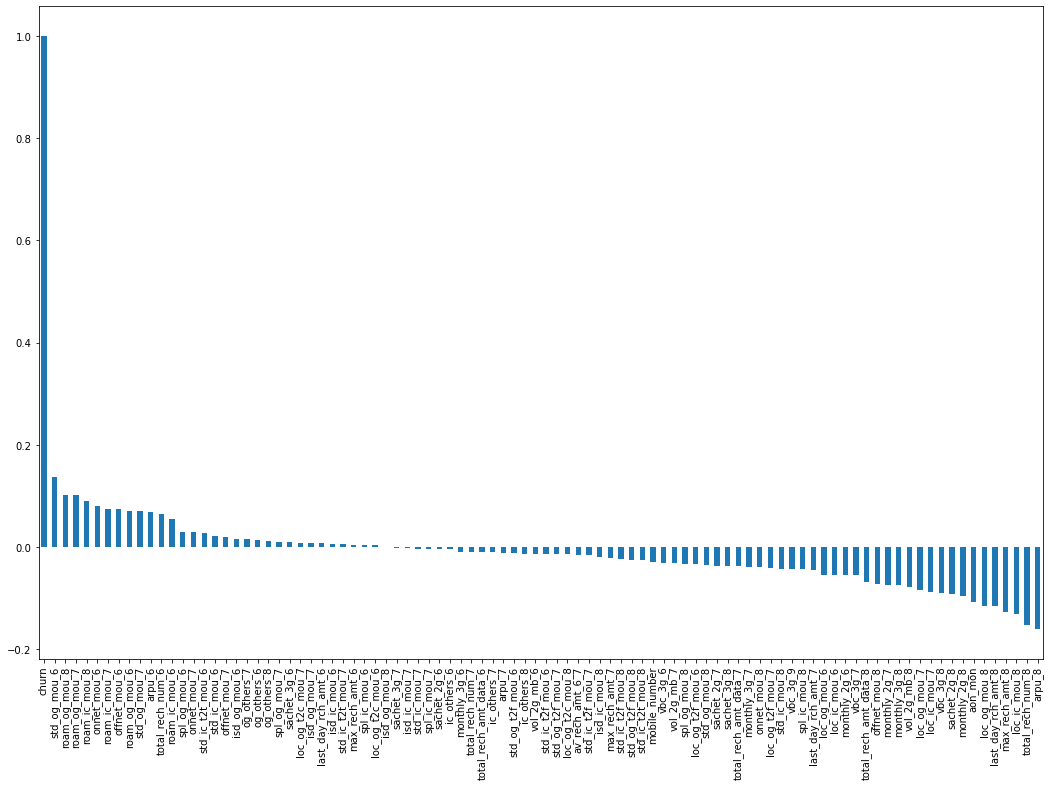

In [92]:
# churn Correlation
plt.figure(figsize=(18,12))
telecom_HighValueCustomer.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

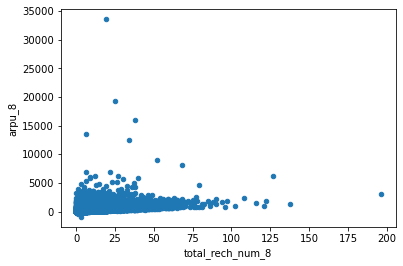

In [93]:
# Relationship between Total recharge in 8th month Vs Average revenue in 8th month

telecom_HighValueCustomer[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')

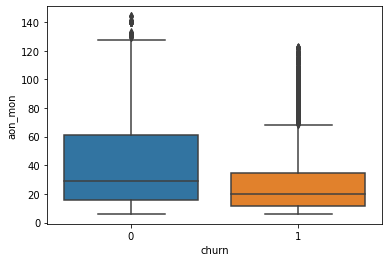

In [94]:
# Relationship between churn and Tenure
sns.boxplot(x = telecom_HighValueCustomer.churn, y = telecom_HighValueCustomer.aon_mon)

In [95]:
# storing processed data to another data frame for further processing

telecom_data = telecom_HighValueCustomer[:].copy()

In [96]:
# Dropping mobile_number
telecom_data.drop('mobile_number', axis=1, inplace=True)

# Since all values are realted to Price/ Cost/ Amount, Filling NaN with 0

telecom_data.fillna(0, inplace=True)

In [97]:
X = telecom_data.drop(['churn'], axis=1)
y = telecom_data['churn']

telecom_data.drop('churn', axis=1, inplace=True)

In [98]:
# Scaling
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100,stratify = y)

In [99]:
y_train.value_counts()/len(y_train)*100

0    91.877713
1     8.122287
Name: churn, dtype: float64

In [100]:
y_test.value_counts()/len(y_test)*100

0    91.876252
1     8.123748
Name: churn, dtype: float64

## Using Principal Component Analysis

In [101]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# PCA on the train data
pca.fit(X_train)

PCA(random_state=100)

In [103]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(20967, 92)
(8986, 92)


## Using Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8156  100]
 [ 529  201]]


In [106]:
# Logistic Regression accuracy with PCA
print(accuracy_score(y_test,y_pred))

0.9300022256843979


In [107]:
col = list(telecom_data.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})

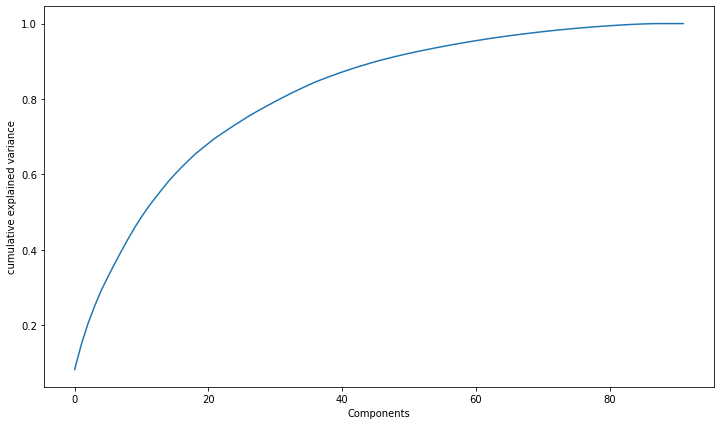

In [108]:
# Screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('cumulative explained variance')
plt.show()

In [109]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  8.2 ,  14.84,  20.4 ,  25.08,  29.29,  32.89,  36.32,  39.68,
        42.89,  45.93,  48.71,  51.29,  53.62,  55.88,  58.08,  60.05,
        61.9 ,  63.63,  65.34,  66.8 ,  68.22,  69.6 ,  70.82,  72.  ,
        73.16,  74.29,  75.4 ,  76.45,  77.43,  78.4 ,  79.35,  80.28,
        81.18,  82.05,  82.9 ,  83.72,  84.51,  85.2 ,  85.88,  86.53,
        87.15,  87.75,  88.33,  88.87,  89.4 ,  89.92,  90.39,  90.84,
        91.28,  91.7 ,  92.1 ,  92.49,  92.86,  93.22,  93.57,  93.91,
        94.25,  94.57,  94.88,  95.18,  95.47,  95.75,  96.03,  96.29,
        96.54,  96.78,  97.01,  97.23,  97.45,  97.66,  97.87,  98.06,
        98.25,  98.43,  98.6 ,  98.76,  98.92,  99.06,  99.2 ,  99.33,
        99.45,  99.56,  99.67,  99.77,  99.85,  99.93,  99.99, 100.02,
       100.02, 100.02, 100.02, 100.02])

In [110]:
# LR with 90% variance

pca_90 = PCA(0.9)

df_tr_pca_90 = pca_90.fit_transform(X_train)
print(df_tr_pca_90.shape)

df_test_pca_90 = pca_90.transform(X_test)
print(df_test_pca_90.shape)

(20967, 47)
(8986, 47)


In [111]:
# Executing model using selected variables

lr_pca1 = LogisticRegression()
lr_pca1.fit(df_tr_pca_90, y_train)

# Predicted 
y_pred90 = lr_pca1.predict(df_test_pca_90)

df_y_pred = pd.DataFrame(y_pred90)

In [112]:
print(confusion_matrix(y_test,y_pred90))

[[8146  110]
 [ 563  167]]


In [113]:
# Logistic Regression accuracy with PCA
print(accuracy_score(y_test,y_pred90))

0.9251057200089028


## using RFE and Logistic regression

In [114]:
# Feature reduction using RFE
lr = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

rfe_features = list(telecom_data.columns[rfe.support_])
print("Features identified using RFE ", rfe_features)

Features identified using RFE  ['arpu_6', 'loc_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_9', 'total_rech_amt_data_8']


In [115]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_rfe, y_rfe)

X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8196   60]
 [ 578  152]]


In [116]:
print('Accuracy of Logistic Regression Model: ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model:  0.9290006677053194


* ### Accuracy is ~ 93%

#### Using Decision Trees

In [117]:
# Feature selection using LASSO

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
linsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(linsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)

# Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(20967, 20)
[ 0  2  8  9 13 14 22 26 40 52 59 61 64 67 70 72 73 76 83 91]


In [118]:
#feature vector for decision tree
lasso_features = list(telecom_data.columns[pos])
print(lasso_features)

['arpu_6', 'arpu_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'vbc_3g_8', 'aon_mon']


In [119]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_lasso, y_train)

DecisionTreeClassifier(max_depth=5)

In [120]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dtc.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.70      0.55      0.62       730

    accuracy                           0.94      8986
   macro avg       0.83      0.76      0.79      8986
weighted avg       0.94      0.94      0.94      8986



In [121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[8082  174]
 [ 328  402]]
0.9441353216113955


#### Hyperparameter Tuning

In [122]:
# GridSearchCV to find optimal max_depth

# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [123]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031992,0.005064,0.0016,0.003199,1,{'max_depth': 1},0.928469,0.926085,0.922251,0.935845,...,0.928078,0.004439,10,0.928039,0.928635,0.929593,0.926195,0.928282,0.928149,0.001111
1,0.046398,0.003201,0.0016,0.003200,2,{'max_depth': 2},0.937053,0.938722,0.935130,0.945385,...,0.939333,0.003492,4,0.939486,0.940500,0.941397,0.938834,0.940026,0.940049,0.000874
2,0.075551,0.007550,0.0000,0.000000,3,{'max_depth': 3},0.937053,0.938722,0.935130,0.945385,...,0.939333,0.003492,4,0.939486,0.940500,0.942053,0.938834,0.940026,0.940180,0.001089
3,0.100552,0.013024,0.0016,0.003199,4,{'max_depth': 4},0.939914,0.940153,0.937276,0.945862,...,0.941241,0.002936,1,0.941871,0.942348,0.943961,0.941934,0.942590,0.942541,0.000758
4,0.144502,0.044186,0.0000,0.000000,5,{'max_depth': 5},0.939437,0.942537,0.937515,0.943954,...,0.941146,0.002333,2,0.944256,0.943540,0.944676,0.943186,0.943484,0.943828,0.000551


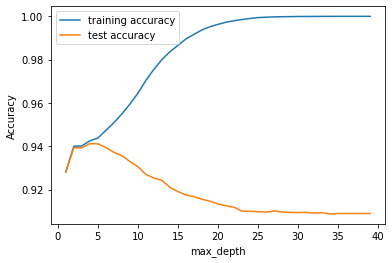

In [124]:
# plotting

plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
# Tuning min sample leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [126]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.458272,0.083716,0.001600,0.003200,5,{'min_samples_leaf': 5},0.924416,0.918932,0.921774,0.927021,...,0.923022,0.002692,10,0.967150,0.967627,0.967271,0.966198,0.966019,0.966853,0.000630
1,0.340779,0.057817,0.004793,0.003913,25,{'min_samples_leaf': 25},0.937053,0.938245,0.932745,0.943954,...,0.937616,0.003659,9,0.947415,0.946939,0.948134,0.945988,0.947299,0.947155,0.000701
2,0.294372,0.026963,0.000000,0.000000,45,{'min_samples_leaf': 45},0.940868,0.938960,0.935130,0.942285,...,0.939142,0.002426,8,0.943779,0.943838,0.944557,0.942947,0.944915,0.944007,0.000683
3,0.265583,0.029680,0.001600,0.003200,65,{'min_samples_leaf': 65},0.941106,0.940629,0.937038,0.944670,...,0.940764,0.002426,4,0.943481,0.942944,0.944021,0.941994,0.943245,0.943137,0.000672
4,0.247803,0.055520,0.003129,0.006257,85,{'min_samples_leaf': 85},0.940153,0.940153,0.936322,0.945385,...,0.940144,0.002971,5,0.942169,0.942229,0.943245,0.941099,0.943245,0.942398,0.000801


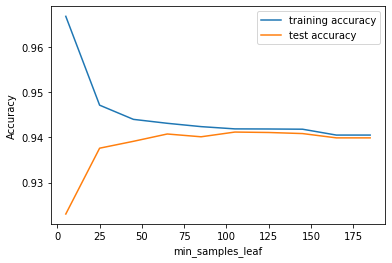

In [127]:
# plotting accuracies

plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* ### min_samples_leaf = 25 seems to be optimal

In [128]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [129]:
# Scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.534346,0.073898,0.001600,0.003199,5,{'min_samples_split': 5},0.913448,0.913686,0.907465,0.912473,...,0.912004,0.002308,10,0.990938,0.991832,0.991296,0.990581,0.990163,0.990962,0.000575
1,0.461172,0.071006,0.001600,0.003199,25,{'min_samples_split': 25},0.927754,0.924893,0.922251,0.927975,...,0.927028,0.003354,9,0.966971,0.967388,0.965840,0.965542,0.966138,0.966376,0.000695
2,0.464771,0.063435,0.003200,0.003920,45,{'min_samples_split': 45},0.930138,0.927277,0.928214,0.931076,...,0.929508,0.001502,8,0.958982,0.958982,0.958865,0.955765,0.958686,0.958256,0.001250
3,0.524765,0.125081,0.001812,0.003120,65,{'min_samples_split': 65},0.934192,0.931807,0.932268,0.932268,...,0.932274,0.001092,7,0.953974,0.954928,0.954394,0.952426,0.954751,0.954095,0.000896
4,0.425559,0.055290,0.004801,0.003920,85,{'min_samples_split': 85},0.932046,0.934907,0.931314,0.937515,...,0.933753,0.002233,6,0.951231,0.951291,0.952188,0.949922,0.953082,0.951543,0.001056


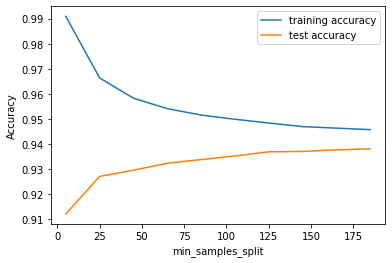

In [130]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* ### min_samples_split = 100 seems to be optimal

In [131]:
# Creating parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search
grid_search.fit(X_lasso, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   31.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [132]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# accuracy score
print("Accuracy", grid_search.best_score_)

Accuracy 0.9414795260761715


In [133]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25,
                       min_samples_split=100)


In [134]:
# optimal hyperparameters
dt_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth = 5, 
                                  min_samples_leaf = 25,
                                  min_samples_split=100)
dt_gini.fit(X_lasso, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=100,
                       random_state=100)

In [135]:
# accuracy score
print (dt_gini.score(X_test,y_test))

0.9442466058312932


* ### Model accuracy is 94%

#### Using Random Forests

In [136]:
# random forests with default hyperparameters

rf = RandomForestClassifier()
rf.fit(X_lasso, y_train)

# Making predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9441353216113955


In [137]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.73      0.49      0.59       730

    accuracy                           0.94      8986
   macro avg       0.84      0.74      0.78      8986
weighted avg       0.94      0.94      0.94      8986



In [138]:
# confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[8126  130]
 [ 372  358]]


In [139]:
# Hyperparameter tuning

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.324678,0.143591,0.060803,0.013000,2,{'max_depth': 2},0.938007,0.938960,0.934653,0.940138,...,0.938379,0.002027,4,0.937817,0.938890,0.940145,0.937940,0.938357,0.938630,0.000846
1,3.590115,0.186034,0.076487,0.020809,7,{'max_depth': 7},0.941583,0.940153,0.938469,0.946101,...,0.941861,0.002599,2,0.946760,0.947535,0.949267,0.946584,0.947597,0.947549,0.000949
2,4.917201,0.292130,0.084795,0.011973,12,{'max_depth': 12},0.941345,0.942299,0.938946,0.946339,...,0.942433,0.002419,1,0.969534,0.970488,0.971802,0.970550,0.970788,0.970632,0.000725
3,5.680096,0.608061,0.108791,0.020621,17,{'max_depth': 17},0.942299,0.941583,0.937992,0.944670,...,0.941623,0.002141,3,0.992548,0.991892,0.993144,0.992011,0.993025,0.992524,0.000510


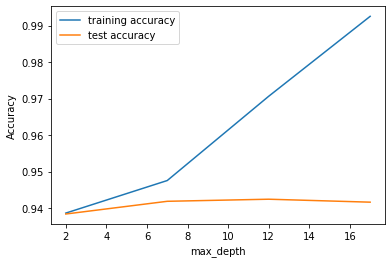

In [141]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [142]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

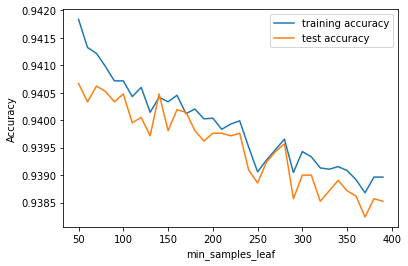

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

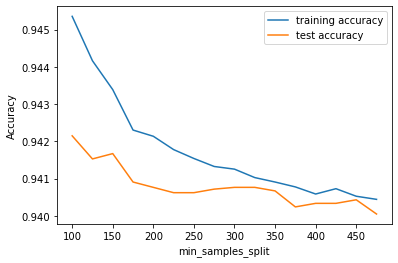

In [144]:
# tuning min_sample_split

n_folds = 5
parameters = {'min_samples_split': range(100, 500, 25)}
rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_train)

# GridSearch CV
scores = rf.cv_results_

# accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
# parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}

rf = RandomForestClassifier()
# Instantiating the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# predictions
prediction_test = model_rf.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8305
           1       0.78      0.40      0.53       681

    accuracy                           0.95      8986
   macro avg       0.87      0.69      0.75      8986
weighted avg       0.94      0.95      0.94      8986

[[8230   75]
 [ 411  270]]


In [138]:
print (accuracy_score(y_test, prediction_test))

0.9459158691297574


* ### Model accuracy ~ 94%

## Analysis Results:

* outgoing calls outside the operator T network are also good indicators of churn
* Decision Tree and Random forests are the comparatively best methods by margin to find significant features
* Above study provides 8th month can be the base of Churn Analysis
* local calls, incoming calls and minutes of usage to be monitored to avoid customer churn
* Average revenue per customer and Max Recharge Amount are also potential Churn Indicators
* Logistic Regression with PCA provides around 93% accuracy on predictions. 